In [3]:
import pandas as pd
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("darkgrid")
import pymc3 as pm
sns.plt = plt

# Ejercicios 1 y 2:
Calculamos la posterior de ambos modelos y la graficamos (Notar que en el grafico se muetra la media) y luego su MAP

In [116]:
def modelator_binomial(n, observed, beta1, beta2):
    model1 = pm.Model()
    model2 = pm.Model()
    with model1:
        theta = pm.Beta('theta', beta1, beta2)
        k = pm.Binomial('k',p=theta, n=n, observed=observed)
        p1 = pm.sample()
        pm.plot_posterior(p1)
        plt.show()
        pm.traceplot(p1)
        plt.show()
        
        map_estimate1 = pm.find_MAP(model=model1)
        print "MAP:" + str(map_estimate1['theta'])
     
    with model2:
        theta = pm.Beta('theta2', beta1, beta2)
        k = pm.Binomial('k',p=theta, n=n)
        p2 = pm.sample()
    
    return (model1, p1, model2, p2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:00<00:00, 1265.61it/s]


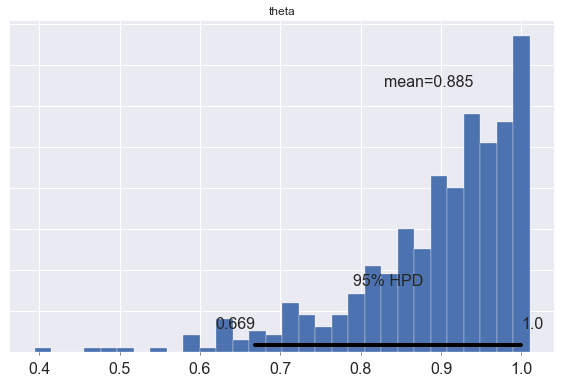

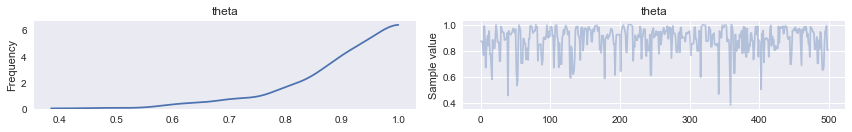

logp = -0.0023631, ||grad|| = 0.0023627: 100%|██████████| 20/20 [00:00<00:00, 1728.04it/s]  


MAP:0.999998462083


Assigned NUTS to theta2_logodds__
Assigned Metropolis to k
 96%|█████████▌| 955/1000 [00:01<00:00, 716.58it/s]/usr/local/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.695355344263, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
100%|██████████| 1000/1000 [00:01<00:00, 716.81it/s]


In [119]:
model1_1, p1_1, model1_2, p1_2 = modelator_binomial(6,6, 1,1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:00<00:00, 1290.19it/s]


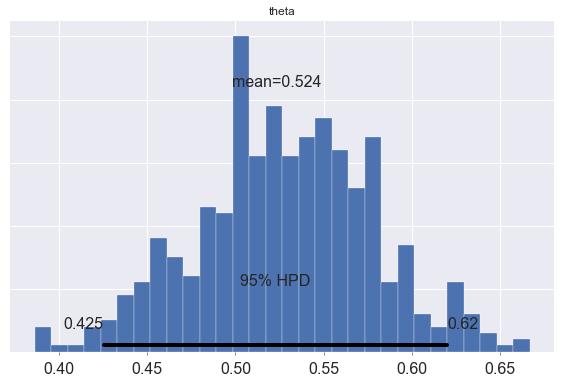

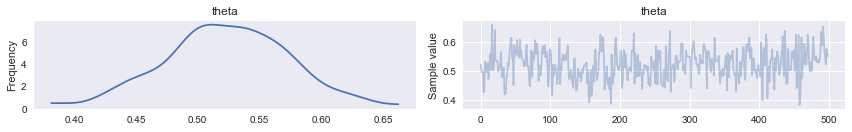

logp = -2.0846, ||grad|| = 3: 100%|██████████| 6/6 [00:00<00:00, 1210.19it/s]


MAP:0.528846153741


Assigned NUTS to theta2_logodds__
Assigned Metropolis to k
100%|██████████| 1000/1000 [00:01<00:00, 698.14it/s]


In [120]:
model2_1, p2_1, model2_2, p2_2 = modelator_binomial(6,6, 50,50 )

# Ejercicio 3

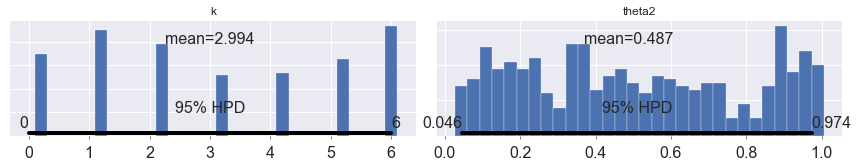

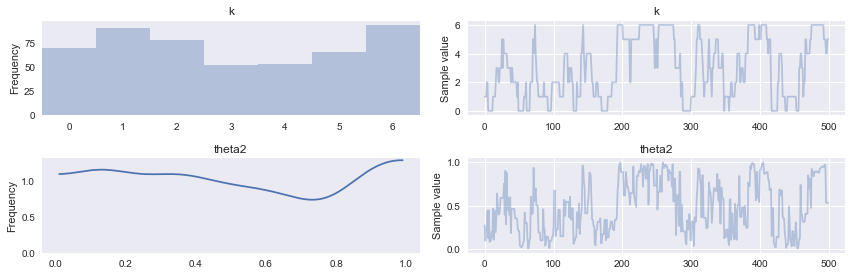

In [122]:
pm.plot_posterior(p1_2)
plt.show()
pm.traceplot(p1_2)
plt.show()